In [1]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_train_full.shape

(60000, 28, 28)

In [3]:
X_train_full.dtype

dtype('uint8')

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train[0]]

'Coat'

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

In [10]:
hidden1 = model.layers[1] 

In [11]:
hidden1.name

'dense'

In [12]:
model.get_layer('dense') is hidden1

True

In [13]:
weights, biases = hidden1.get_weights()
weights

array([[-0.05611897, -0.01742017, -0.06280341, ...,  0.05787478,
         0.06824706,  0.00993928],
       [ 0.02944626, -0.0642194 , -0.04562339, ..., -0.02969579,
        -0.04859126,  0.05929109],
       [ 0.06104016,  0.04062845,  0.07206349, ...,  0.02098257,
         0.06296967, -0.05388258],
       ...,
       [ 0.07360083,  0.06710593,  0.00547843, ...,  0.01928623,
        -0.00294094,  0.07184003],
       [-0.03172245,  0.05250253, -0.03155266, ...,  0.01755567,
        -0.03472519, -0.02752243],
       [ 0.00070219, -0.0337647 , -0.0090069 , ...,  0.06616005,
         0.01610182,  0.01520051]], dtype=float32)

In [14]:
weights.shape

(784, 300)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
biases.shape

(300,)

In [17]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7087 - accuracy: 0.7659 - val_loss: 0.5134 - val_accuracy: 0.8248
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4854 - accuracy: 0.8307 - val_loss: 0.4450 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4411 - accuracy: 0.8441 - val_loss: 0.4180 - val_accuracy: 0.8566
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4135 - accuracy: 0.8537 - val_loss: 0.3955 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3941 - accuracy: 0.8604 - val_loss: 0.3844 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3779 - accuracy: 0.8664 - val_loss: 0.3767 - val_accuracy: 0.8684
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3652 - accuracy: 0.8699 - val_loss: 0.4040 - val_accuracy:

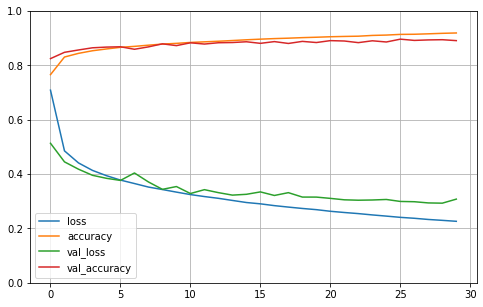

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # 수직축의 범위를 [0-1] 사이로 설정정
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8836


[0.3338942527770996, 0.8835999965667725]

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 195ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
import numpy as np

# 예측 확률 계산
predictions = model.predict(X_new)

# 가장 높은 확률을 가진 클래스 선택
predicted_classes = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 22ms/step


In [37]:
predicted_classes

array([9, 2, 1], dtype=int64)

In [38]:
np.array(class_names)[predicted_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_new = y_test[:3]

In [40]:
y_new

array([9, 2, 1], dtype=uint8)